In [95]:
from google.colab import drive
drive.mount('/content/drive')

Drive already mounted at /content/drive; to attempt to forcibly remount, call drive.mount("/content/drive", force_remount=True).


Problem 1A: Single-Year HDI Exploration (2022)

In [96]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

pd.set_option("display.max_columns", None)
pd.set_option("display.max_rows", 100)


In [97]:
import pandas as pd

path = "/content/drive/MyDrive/Colab Notebooks/Human_Development_Index_Dataset.csv"
df = pd.read_csv(path, encoding="latin1")
df.drop(columns=['Unnamed: 0'], inplace=True)
df.head()


,iso3,country,year,hdi,life_expectancy,pop_millions,hdi_f,hdi_m,life_expec_f,life_expec_m,expec_yr_school,expec_yr_school_f,expec_yr_school_m,mean_yr_school,mean_yr_school_f,mean_yr_school_m,gross_inc_percap,gross_inc_percap_f,gross_inc_percap_m,gender_development,gender_inequality,secondary_education_f_%,secondary_education_m_%,seats_in_parliament_f_%,seats_in_parliament_m_%,labour_participation_f_%,labour_participation_m_%,co2_emission_tons,mat_footprint_percap_tons
0,AFG,Afghanistan,1990,0.284,45.967,10.694796,NaN,NaN,48.397,43.709,2.936460,2.117230,4.532768,0.871962,0.201659,1.493952,3115.670448,NaN,NaN,NaN,NaN,1.107733,7.899011,NaN,NaN,NaN,NaN,0.189279,2.1809
1,AFG,Afghanistan,1991,0.292,46.663,10.745167,NaN,NaN,49.144,44.353,3.228456,2.246242,4.768261,0.915267,0.218944,1.578809,2817.304736,NaN,NaN,NaN,NaN,1.221396,8.137953,NaN,NaN,NaN,NaN,0.178155,2.5264
2,AFG,Afghanistan,1992,0.299,47.596,12.057433,NaN,NaN,50.320,45.070,3.520452,2.383115,5.015989,0.958573,0.236229,1.663665,2474.681985,NaN,NaN,NaN,NaN,1.335059,8.376896,NaN,NaN,NaN,NaN,0.122920,2.6421
3,AFG,Afghanistan,1993,0.307,51.466,14.003760,NaN,NaN,52.739,50.216,3.812448,2.528328,5.276587,1.001878,0.253514,1.748522,1723.019763,NaN,NaN,NaN,NaN,1.448722,8.615838,NaN,NaN,NaN,NaN,0.106179,2.3022
4,AFG,Afghanistan,1994,0.300,51.495,15.455554,NaN,NaN,53.544,49.531,4.104445,2.682390,5.550723,1.045184,0.270800,1.833378,1202.010488,NaN,NaN,NaN,NaN,1.562385,8.854780,NaN,NaN,NaN,NaN,0.094063,1.8948


In [98]:
df.shape


(6798, 29)

In [99]:
# Identifying all unique years available in the dataset
df['year'].unique()


array([1990, 1991, 1992, 1993, 1994, 1995, 1996, 1997, 1998, 1999, 2000,
       2001, 2002, 2003, 2004, 2005, 2006, 2007, 2008, 2009, 2010, 2011,
       2012, 2013, 2014, 2015, 2016, 2017, 2018, 2019, 2020, 2021, 2022])

In [100]:
# Filtering dataset to include only records from the year 2022
hdi_2022_df = df[df['year'] == 2022].copy()

# Displaying first 5 rows of the filtered dataset
hdi_2022_df.head()


,iso3,country,year,hdi,life_expectancy,pop_millions,hdi_f,hdi_m,life_expec_f,life_expec_m,expec_yr_school,expec_yr_school_f,expec_yr_school_m,mean_yr_school,mean_yr_school_f,mean_yr_school_m,gross_inc_percap,gross_inc_percap_f,gross_inc_percap_m,gender_development,gender_inequality,secondary_education_f_%,secondary_education_m_%,seats_in_parliament_f_%,seats_in_parliament_m_%,labour_participation_f_%,labour_participation_m_%,co2_emission_tons,mat_footprint_percap_tons
32,AFG,Afghanistan,2022,0.462,62.879,41.128771,0.332443,0.534145,66.213,59.766,10.705385,8.053257,13.228449,2.514790,1.174130,3.912740,1335.205733,395.915459,2256.217507,0.622,0.665,7.042050,24.077040,27.215190,72.784810,23.33,77.09,0.306318,1.1809
65,ALB,Albania,2022,0.789,76.833,2.842321,0.780277,0.798432,79.472,74.502,14.487470,14.681040,14.292200,10.121144,9.811468,10.433855,15293.326510,13198.539560,17398.003690,0.977,0.116,82.249185,86.476634,35.714286,64.285714,56.08,69.91,1.717758,11.7367
98,DZA,Algeria,2022,0.745,77.129,44.903225,0.681844,0.773800,78.457,75.853,15.487880,16.264179,14.743880,6.987444,6.490568,7.481537,10978.405710,3841.656612,17858.790780,0.881,0.460,42.910456,46.815170,7.005254,92.994746,17.57,65.53,4.079540,8.7199
131,AND,Andorra,2022,0.884,83.552,0.079824,NaN,NaN,85.838,81.430,12.783780,12.765060,12.810630,11.613440,11.522590,11.704380,54233.449480,NaN,NaN,NaN,NaN,81.718277,84.599998,46.428571,53.571429,NaN,NaN,4.593593,NaN
164,AGO,Angola,2022,0.591,61.929,35.588987,0.560890,0.619680,64.541,59.351,12.167600,11.535400,12.909900,5.844292,4.462809,7.187960,5327.788251,4696.356687,5973.845631,0.905,0.520,21.339865,37.411946,33.636364,66.363636,74.73,78.16,0.507359,3.6568


In [101]:
# Verifying that only year 2022 is present
hdi_2022_df['year'].unique()


array([2022])

In [102]:
# Displaying first 10 rows of the 2022 dataset
hdi_2022_df.head(10)


,iso3,country,year,hdi,life_expectancy,pop_millions,hdi_f,hdi_m,life_expec_f,life_expec_m,expec_yr_school,expec_yr_school_f,expec_yr_school_m,mean_yr_school,mean_yr_school_f,mean_yr_school_m,gross_inc_percap,gross_inc_percap_f,gross_inc_percap_m,gender_development,gender_inequality,secondary_education_f_%,secondary_education_m_%,seats_in_parliament_f_%,seats_in_parliament_m_%,labour_participation_f_%,labour_participation_m_%,co2_emission_tons,mat_footprint_percap_tons
32,AFG,Afghanistan,2022,0.462,62.879,41.128771,0.332443,0.534145,66.213,59.766,10.705385,8.053257,13.228449,2.514790,1.174130,3.912740,1335.205733,395.915459,2256.217507,0.622,0.665,7.042050,24.077040,27.215190,72.784810,23.33,77.09,0.306318,1.1809
65,ALB,Albania,2022,0.789,76.833,2.842321,0.780277,0.798432,79.472,74.502,14.487470,14.681040,14.292200,10.121144,9.811468,10.433855,15293.326510,13198.539560,17398.003690,0.977,0.116,82.249185,86.476634,35.714286,64.285714,56.08,69.91,1.717758,11.7367
98,DZA,Algeria,2022,0.745,77.129,44.903225,0.681844,0.773800,78.457,75.853,15.487880,16.264179,14.743880,6.987444,6.490568,7.481537,10978.405710,3841.656612,17858.790780,0.881,0.460,42.910456,46.815170,7.005254,92.994746,17.57,65.53,4.079540,8.7199
131,AND,Andorra,2022,0.884,83.552,0.079824,NaN,NaN,85.838,81.430,12.783780,12.765060,12.810630,11.613440,11.522590,11.704380,54233.449480,NaN,NaN,NaN,NaN,81.718277,84.599998,46.428571,53.571429,NaN,NaN,4.593593,NaN
164,AGO,Angola,2022,0.591,61.929,35.588987,0.560890,0.619680,64.541,59.351,12.167600,11.535400,12.909900,5.844292,4.462809,7.187960,5327.788251,4696.356687,5973.845631,0.905,0.520,21.339865,37.411946,33.636364,66.363636,74.73,78.16,0.507359,3.6568
197,ATG,Antigua and Barbuda,2022,0.826,79.236,0.093763,NaN,NaN,81.645,76.507,15.512328,16.746290,14.350537,10.546230,10.344223,10.595975,18783.965360,NaN,NaN,NaN,NaN,NaN,NaN,31.428571,68.571429,NaN,NaN,6.401056,NaN
230,ARG,Argentina,2022,0.849,76.064,45.510318,0.841405,0.845473,79.277,72.851,18.979509,20.914900,17.130329,11.144080,11.391660,10.857980,22047.971310,16933.062910,27264.830910,0.995,0.292,73.591541,71.648085,44.376900,55.623100,52.08,71.74,4.190779,14.4512
263,ARM,Armenia,2022,0.786,73.372,2.780469,0.795110,0.774942,78.447,67.866,14.405610,14.812910,14.022340,11.330300,11.321520,11.341190,15388.299760,13442.501330,17770.415300,1.026,0.198,96.001381,97.050957,35.514019,64.485981,62.80,71.84,2.531088,7.3553
296,AUS,Australia,2022,0.946,83.579,26.177414,0.934602,0.955941,85.453,81.708,21.080021,21.981430,20.193760,12.726820,12.810590,12.639710,49257.135200,41131.470850,57495.771580,0.978,0.063,94.580063,94.430069,44.493392,55.506608,62.31,71.13,14.914763,26.9245
329,AUT,Austria,2022,0.926,82.412,8.939617,0.911592,0.937756,84.600,80.150,16.367460,16.838499,15.922670,12.305714,12.048949,12.578872,56529.663290,41899.211240,71616.204300,0.972,0.048,100.000000,100.000000,40.983607,59.016393,56.55,66.69,7.399461,27.9621


In [103]:
# Checking number of rows and columns in the 2022 dataset
hdi_2022_df.shape


(206, 29)

In [104]:
# Listing all column names
hdi_2022_df.columns


Index(['iso3', 'country', 'year', 'hdi', 'life_expectancy', 'pop_millions',
       'hdi_f', 'hdi_m', 'life_expec_f', 'life_expec_m', 'expec_yr_school',
       'expec_yr_school_f', 'expec_yr_school_m', 'mean_yr_school',
       'mean_yr_school_f', 'mean_yr_school_m', 'gross_inc_percap',
       'gross_inc_percap_f', 'gross_inc_percap_m', 'gender_development',
       'gender_inequality', 'secondary_education_f_%',
       'secondary_education_m_%', 'seats_in_parliament_f_%',
       'seats_in_parliament_m_%', 'labour_participation_f_%',
       'labour_participation_m_%', 'co2_emission_tons',
       'mat_footprint_percap_tons'],
      dtype='object')

In [105]:
# Checking data types of each column
hdi_2022_df.dtypes


,0
iso3,object
country,object
year,int64
hdi,float64
life_expectancy,float64
pop_millions,float64
hdi_f,float64
hdi_m,float64
life_expec_f,float64
life_expec_m,float64


**Missing Values & Data Cleaning**

In [106]:
# Checking total missing values in each column
hdi_2022_df.isnull().sum()


,0
iso3,0
country,0
year,0
hdi,2
life_expectancy,0
pop_millions,0
hdi_f,13
hdi_m,13
life_expec_f,0
life_expec_m,0


In [107]:
# Identifying duplicate rows in the dataset
hdi_2022_df.duplicated().sum()


np.int64(0)

In [108]:
# Converting selected columns to numeric format safely
numeric_columns = ['hdi', 'life_expectancy', 'gross_inc_percap']

for col in numeric_columns:
    if col in hdi_2022_df.columns:
        hdi_2022_df.loc[:, col] = pd.to_numeric(
            hdi_2022_df[col], errors='coerce'
        )


In [109]:
# Droping rows with missing values
#thus,Missing values were minimal and could affect statistical analysis
hdi_2022_df = hdi_2022_df.dropna()


Basic Statistical **Analysis**

In [110]:
# Calculating basic statistics for HDI in 2022
hdi_mean = hdi_2022_df['hdi'].mean()
hdi_median = hdi_2022_df['hdi'].median()
hdi_std = hdi_2022_df['hdi'].std()

hdi_mean, hdi_median, hdi_std


(np.float64(0.7314177215189873), 0.759, 0.1571854442617671)

In [111]:
# Identifying country with highest HDI
hdi_2022_df.loc[hdi_2022_df['hdi'].idxmax(), ['country', 'hdi']]




,5609
country,Switzerland
hdi,0.967


In [112]:
# Identifying country with lowest HDI
hdi_2022_df.loc[hdi_2022_df['hdi'].idxmin(), ['country', 'hdi']]


,5345
country,Somalia
hdi,0.38


In [113]:
# Filtering countries with HDI greater than 0.800
# Sorted by Gross National Income per capita in descending order
high_hdi_countries = hdi_2022_df[hdi_2022_df['hdi'] > 0.800] \
                        .sort_values(by='gross_inc_percap', ascending=False)

# Displaying top 10 countries
high_hdi_countries.head(10)


,iso3,country,year,hdi,life_expectancy,pop_millions,hdi_f,hdi_m,life_expec_f,life_expec_m,expec_yr_school,expec_yr_school_f,expec_yr_school_m,mean_yr_school,mean_yr_school_f,mean_yr_school_m,gross_inc_percap,gross_inc_percap_f,gross_inc_percap_m,gender_development,gender_inequality,secondary_education_f_%,secondary_education_m_%,seats_in_parliament_f_%,seats_in_parliament_m_%,labour_participation_f_%,labour_participation_m_%,co2_emission_tons,mat_footprint_percap_tons
4718,QAT,Qatar,2022,0.875,81.559,2.695122,0.892561,0.869100,83.101,80.626,13.264270,15.289560,12.649090,10.131722,11.796383,9.737610,95944.37754,47963.67663,114134.84230,1.027,0.212,81.832741,71.417976,4.444444,95.555556,61.73,95.33,39.884274,63.5912
5213,SGP,Singapore,2022,0.949,84.133,5.975689,0.945325,0.954078,86.295,81.981,16.902731,17.034019,16.810640,11.924880,11.627060,12.254710,88761.14559,76610.86780,99844.23650,0.991,0.036,80.464020,85.932037,29.126214,70.873786,63.37,77.00,9.397481,43.1508
2705,IRL,Ireland,2022,0.950,82.716,5.023109,0.942838,0.951392,84.412,81.017,19.126101,19.475800,18.771580,11.656957,11.863226,11.437631,87467.51391,66876.42142,108423.61080,0.991,0.072,88.585639,86.417415,27.397260,72.602740,59.40,70.51,7.529751,26.3467
3398,LUX,Luxembourg,2022,0.927,82.591,0.647599,0.920482,0.927311,84.770,80.445,14.197050,14.315570,14.088360,12.960081,12.934179,12.962670,78554.23640,66697.04897,90255.76002,0.993,0.043,96.579350,89.328283,33.333333,66.666667,57.99,65.09,13.185395,49.1903
6104,ARE,United Arab Emirates,2022,0.937,79.196,9.441128,0.922940,0.936027,81.412,77.720,17.208139,19.753281,16.379900,12.773750,12.588370,12.905890,74103.71494,51509.56703,84087.84953,0.986,0.035,82.029137,86.145172,50.000000,50.000000,55.32,89.45,25.333276,28.1632
5609,CHE,Switzerland,2022,0.967,84.255,8.740472,0.949369,0.977383,85.932,82.484,16.583731,16.677860,16.498199,13.904066,13.549473,14.268536,69432.78669,56927.80503,82109.48430,0.971,0.018,96.939726,97.517437,39.024390,60.975610,61.49,71.94,4.117550,33.5913
4322,NOR,Norway,2022,0.966,83.393,5.434319,0.957148,0.970415,85.055,81.718,18.638460,19.521360,17.803841,13.062343,13.210113,12.912692,69189.76165,61067.47743,77164.33022,0.986,0.012,99.094031,99.274980,44.970414,55.029586,62.53,69.59,7.573541,32.0515
6170,USA,United States,2022,0.927,78.203,338.289857,0.927693,0.923405,81.015,75.479,16.412741,17.262751,15.585690,13.575500,13.653570,13.493290,65564.93798,53469.38514,77898.33045,1.005,0.180,95.424278,95.067093,28.060264,71.939736,56.79,67.97,14.932487,29.3498
1550,DNK,Denmark,2022,0.952,81.882,5.882262,0.941874,0.959920,83.802,79.958,18.774031,19.375191,18.192711,12.960490,13.156950,12.764150,62018.95694,51753.40967,72387.09453,0.981,0.009,95.067261,95.238098,43.575419,56.424581,59.42,67.42,5.057582,24.2328
824,BRN,Brunei Darussalam,2022,0.823,74.551,0.449001,0.814382,0.828827,76.791,72.509,13.698620,14.177340,13.252250,9.220000,9.230000,9.230000,59245.63485,44702.92641,72823.32823,0.983,0.279,70.900000,71.500000,9.090909,90.909091,54.89,71.65,25.376258,37.8287


In [114]:
# Function to classify HDI values into official UNDP categories
def classify_hdi(hdi):
    if hdi < 0.550:
        return "Low"
    elif hdi < 0.700:
        return "Medium"
    elif hdi < 0.800:
        return "High"
    else:
        return "Very High"

# Applying classification
hdi_2022_df['HDI_Category'] = hdi_2022_df['hdi'].apply(classify_hdi)

# Verifying new column
hdi_2022_df.head()


,iso3,country,year,hdi,life_expectancy,pop_millions,hdi_f,hdi_m,life_expec_f,life_expec_m,expec_yr_school,expec_yr_school_f,expec_yr_school_m,mean_yr_school,mean_yr_school_f,mean_yr_school_m,gross_inc_percap,gross_inc_percap_f,gross_inc_percap_m,gender_development,gender_inequality,secondary_education_f_%,secondary_education_m_%,seats_in_parliament_f_%,seats_in_parliament_m_%,labour_participation_f_%,labour_participation_m_%,co2_emission_tons,mat_footprint_percap_tons,HDI_Category
32,AFG,Afghanistan,2022,0.462,62.879,41.128771,0.332443,0.534145,66.213,59.766,10.705385,8.053257,13.228449,2.514790,1.174130,3.912740,1335.205733,395.915459,2256.217507,0.622,0.665,7.042050,24.077040,27.215190,72.784810,23.33,77.09,0.306318,1.1809,Low
65,ALB,Albania,2022,0.789,76.833,2.842321,0.780277,0.798432,79.472,74.502,14.487470,14.681040,14.292200,10.121144,9.811468,10.433855,15293.326510,13198.539560,17398.003690,0.977,0.116,82.249185,86.476634,35.714286,64.285714,56.08,69.91,1.717758,11.7367,High
98,DZA,Algeria,2022,0.745,77.129,44.903225,0.681844,0.773800,78.457,75.853,15.487880,16.264179,14.743880,6.987444,6.490568,7.481537,10978.405710,3841.656612,17858.790780,0.881,0.460,42.910456,46.815170,7.005254,92.994746,17.57,65.53,4.079540,8.7199,High
164,AGO,Angola,2022,0.591,61.929,35.588987,0.560890,0.619680,64.541,59.351,12.167600,11.535400,12.909900,5.844292,4.462809,7.187960,5327.788251,4696.356687,5973.845631,0.905,0.520,21.339865,37.411946,33.636364,66.363636,74.73,78.16,0.507359,3.6568,Medium
230,ARG,Argentina,2022,0.849,76.064,45.510318,0.841405,0.845473,79.277,72.851,18.979509,20.914900,17.130329,11.144080,11.391660,10.857980,22047.971310,16933.062910,27264.830910,0.995,0.292,73.591541,71.648085,44.376900,55.623100,52.08,71.74,4.190779,14.4512,Very High


In [115]:
# Saved the processed dataset with HDI categories
hdi_2022_df.to_csv("HDI_category_added.csv", index=False)


### Q1A.1: Basic Statistical Properties of HDI (2022)

The mean and median HDI values for 2022 indicate the overall level of human development across countries, while the standard deviation shows the extent of variation in HDI levels. The results suggest moderate variation, indicating differences in development levels among countries.


### Q1A.2: Highest and Lowest HDI Countries (2022)

In 2022, the country with the highest HDI represents very high human development, while the country with the lowest HDI reflects significant development challenges. This highlights global disparities in human development outcomes.


### Q1A.3: Distribution of Countries by HDI Category

Countries are distributed across Low, Medium, High, and Very High HDI categories. A larger number of countries fall into the Medium and High HDI categories, while fewer countries are classified as Very High or Low, indicating uneven global development.


### Q1A.4: Income Patterns for High HDI Countries

Countries with HDI values greater than 0.800 generally have higher gross national income per capita. This suggests a strong association between income levels and higher human development.


# Problem 1B: HDI Trend Analysis (2020–2022)

This section analyzes HDI trends over the period 2020–2022 using
visual and statistical methods.

In [116]:
# Filtering dataset for the years 2020, 2021, and 2022
hdi_2020_2022_df = df[df['year'].isin([2020, 2021, 2022])].copy()

# Previewing the filtered data
hdi_2020_2022_df.head()


,iso3,country,year,hdi,life_expectancy,pop_millions,hdi_f,hdi_m,life_expec_f,life_expec_m,expec_yr_school,expec_yr_school_f,expec_yr_school_m,mean_yr_school,mean_yr_school_f,mean_yr_school_m,gross_inc_percap,gross_inc_percap_f,gross_inc_percap_m,gender_development,gender_inequality,secondary_education_f_%,secondary_education_m_%,seats_in_parliament_f_%,seats_in_parliament_m_%,labour_participation_f_%,labour_participation_m_%,co2_emission_tons,mat_footprint_percap_tons
30,AFG,Afghanistan,2020,0.488,62.575,38.972231,0.381373,0.548741,65.432,59.866,10.705385,8.053257,13.228449,2.841610,2.050737,3.407107,1986.803772,670.996249,3275.057369,0.695,0.674,6.092345,15.945160,27.215190,72.784810,16.50,66.84,0.305040,1.5554
31,AFG,Afghanistan,2021,0.473,61.982,40.099462,0.379129,0.528559,65.279,58.915,10.705385,8.053257,13.228449,2.985070,2.311080,3.401310,1534.135377,618.868288,2430.862265,0.717,0.653,6.395730,14.865710,27.215190,72.784810,23.33,77.09,0.306318,1.2351
32,AFG,Afghanistan,2022,0.462,62.879,41.128771,0.332443,0.534145,66.213,59.766,10.705385,8.053257,13.228449,2.514790,1.174130,3.912740,1335.205733,395.915459,2256.217507,0.622,0.665,7.042050,24.077040,27.215190,72.784810,23.33,77.09,0.306318,1.1809
63,ALB,Albania,2020,0.784,76.989,2.866849,0.775404,0.793220,79.676,74.632,14.759720,15.019560,14.492910,10.121144,9.811468,10.433855,13069.127700,11153.644450,14983.695140,0.978,0.129,82.249185,86.476634,29.508197,70.491803,54.45,68.91,1.750668,10.4704
64,ALB,Albania,2021,0.785,76.463,2.854710,0.777866,0.792942,79.173,74.087,14.571750,14.849250,14.289420,10.121144,9.811468,10.433855,14399.780470,12550.782890,16252.408730,0.981,0.117,82.249185,86.476634,35.714286,64.285714,56.08,69.91,1.717758,11.5865


In [117]:
# Confirming only required years are present
hdi_2020_2022_df['year'].unique()


array([2020, 2021, 2022])

In [118]:
# Saving the dataset for Problem 1B
hdi_2020_2022_df.to_csv("HDI_problem1B.csv", index=False)


## Data Cleaning

Before visualization, essential data quality checks were performed
to identify missing values, duplicates, and data type issues.


In [119]:
# Checking missing values in essential columns
hdi_2020_2022_df[['country', 'year', 'hdi']].isnull().sum()


,0
country,0
year,0
hdi,8


In [120]:
# Checking for duplicate rows
hdi_2020_2022_df.duplicated().sum()


np.int64(0)

In [121]:
# Converting numeric columns to correct data types
numeric_columns = ['hdi', 'life_expectancy', 'gross_inc_percap']

for col in numeric_columns:
    if col in hdi_2020_2022_df.columns:
        hdi_2020_2022_df.loc[:, col] = pd.to_numeric(
            hdi_2020_2022_df[col], errors='coerce'
        )


In [122]:
# Droping rows with missing values
# Missing values were minimal and could affect trend analysis
hdi_2020_2022_df = hdi_2020_2022_df.dropna()


## Line Chart: HDI Trends for Selected Countries (2020–2022)



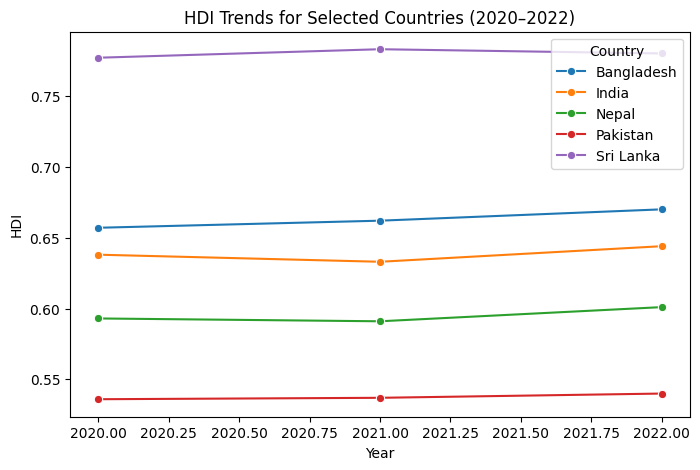

In [123]:
# Select five countries for trend analysis
selected_countries = ['Nepal', 'India', 'Bangladesh', 'Sri Lanka', 'Pakistan']

trend_df = hdi_2020_2022_df[
    hdi_2020_2022_df['country'].isin(selected_countries)
]

plt.figure(figsize=(8, 5))
sns.lineplot(
    data=trend_df,
    x='year',
    y='hdi',
    hue='country',
    marker='o'
)

plt.title("HDI Trends for Selected Countries (2020–2022)")
plt.xlabel("Year")
plt.ylabel("HDI")
plt.legend(title="Country")
plt.show()


## Bar Chart: Average HDI by Region (2020–2022)

This bar chart compares the average Human Development Index (HDI)
across different regions for the years 2020, 2021, and 2022.


In [124]:
possible_region_cols = ['region', 'Region', 'continent', 'Continent', 'un_region', 'world_region', 'sub_region', 'Sub-region']
found = [c for c in possible_region_cols if c in hdi_2020_2022_df.columns]
found


[]

In [125]:
# Creating HDI Category for the 2020–2022 dataset
def classify_hdi(hdi):
    if hdi < 0.550:
        return "Low"
    elif hdi < 0.700:
        return "Medium"
    elif hdi < 0.800:
        return "High"
    else:
        return "Very High"

hdi_2020_2022_df['HDI_Category'] = hdi_2020_2022_df['hdi'].apply(classify_hdi)
hdi_2020_2022_df[['country', 'year', 'hdi', 'HDI_Category']].head()


,country,year,hdi,HDI_Category
30,Afghanistan,2020,0.488,Low
31,Afghanistan,2021,0.473,Low
32,Afghanistan,2022,0.462,Low
63,Albania,2020,0.784,High
64,Albania,2021,0.785,High


In [126]:
# Creating a region mapping for countries sinces region is not mentioned!
region_mapping = {
    # South Asia
    'Afghanistan': 'South Asia',
    'Bangladesh': 'South Asia',
    'Bhutan': 'South Asia',
    'India': 'South Asia',
    'Maldives': 'South Asia',
    'Nepal': 'South Asia',
    'Pakistan': 'South Asia',
    'Sri Lanka': 'South Asia',

    # East Asia & Pacific
    'China': 'East Asia & Pacific',
    'Japan': 'East Asia & Pacific',
    'South Korea': 'East Asia & Pacific',
    'Australia': 'East Asia & Pacific',
    'New Zealand': 'East Asia & Pacific',

    # Europe & Central Asia
    'Germany': 'Europe & Central Asia',
    'France': 'Europe & Central Asia',
    'United Kingdom': 'Europe & Central Asia',
    'Italy': 'Europe & Central Asia',
    'Spain': 'Europe & Central Asia',

    # Middle East & North Africa
    'Saudi Arabia': 'Middle East & North Africa',
    'United Arab Emirates': 'Middle East & North Africa',
    'Qatar': 'Middle East & North Africa',
    'Iran': 'Middle East & North Africa',
    'Egypt': 'Middle East & North Africa',

    # Sub-Saharan Africa
    'Nigeria': 'Sub-Saharan Africa',
    'Kenya': 'Sub-Saharan Africa',
    'Ethiopia': 'Sub-Saharan Africa',
    'South Africa': 'Sub-Saharan Africa',

    # Americas
    'United States': 'Americas',
    'Canada': 'Americas',
    'Brazil': 'Americas',
    'Mexico': 'Americas',
    'Argentina': 'Americas'
}

# Assign region based on country
hdi_2020_2022_df['region'] = hdi_2020_2022_df['country'].map(region_mapping)

# Check how many rows got region values
hdi_2020_2022_df['region'].value_counts()


,count
region,
South Asia,21
Americas,15
Europe & Central Asia,15
East Asia & Pacific,12
Middle East & North Africa,12
Sub-Saharan Africa,12


In [127]:
# Remove rows where region is not defined
region_df = hdi_2020_2022_df.dropna(subset=['region'])

# Group by region and year to calculate average HDI
region_year_hdi = (
    region_df
    .groupby(['region', 'year'])['hdi']
    .mean()
    .reset_index()
)

region_year_hdi.head()


,region,year,hdi
0,Americas,2020,0.84140
1,Americas,2021,0.84240
2,Americas,2022,0.85040
3,East Asia & Pacific,2020,0.89525
4,East Asia & Pacific,2021,0.89750


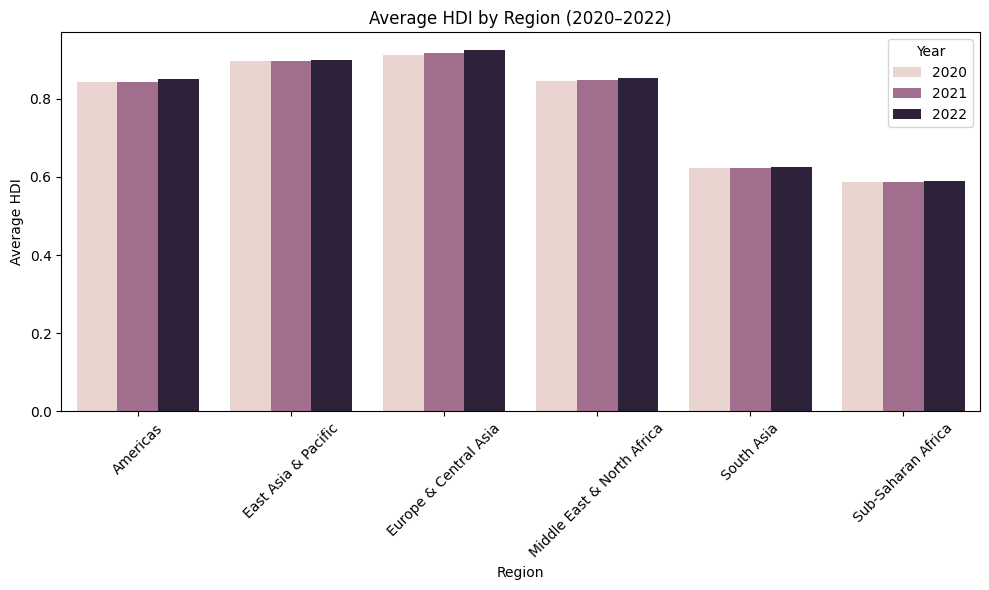

In [128]:
# Bar chart: Average HDI by Region (2020–2022)
plt.figure(figsize=(10, 6))

sns.barplot(
    data=region_year_hdi,
    x='region',
    y='hdi',
    hue='year'
)

plt.title("Average HDI by Region (2020–2022)")
plt.xlabel("Region")
plt.ylabel("Average HDI")
plt.xticks(rotation=45)
plt.legend(title="Year")
plt.tight_layout()
plt.show()


## Box Plot: HDI Distribution (2020–2022)

This box plot shows the distribution of HDI values for the years
2020, 2021, and 2022.The median, spread, and potential outliers.


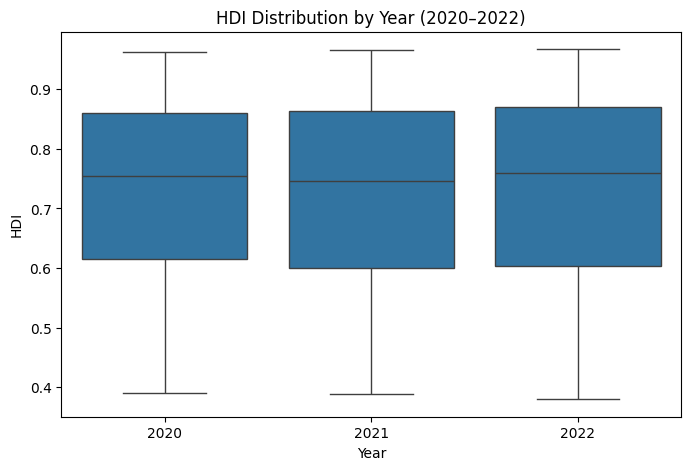

In [129]:
# Box plot to visualize HDI distribution across years
plt.figure(figsize=(8, 5))

sns.boxplot(
    data=hdi_2020_2022_df,
    x='year',
    y='hdi'
)

plt.title("HDI Distribution by Year (2020–2022)")
plt.xlabel("Year")
plt.ylabel("HDI")
plt.show()


## Scatter Plot: HDI vs Gross National Income (GNI) per Capita (2020–2022)

This scatter plot examines the relationship between HDI and
Gross National Income (GNI) per capita across the years 2020–2022.


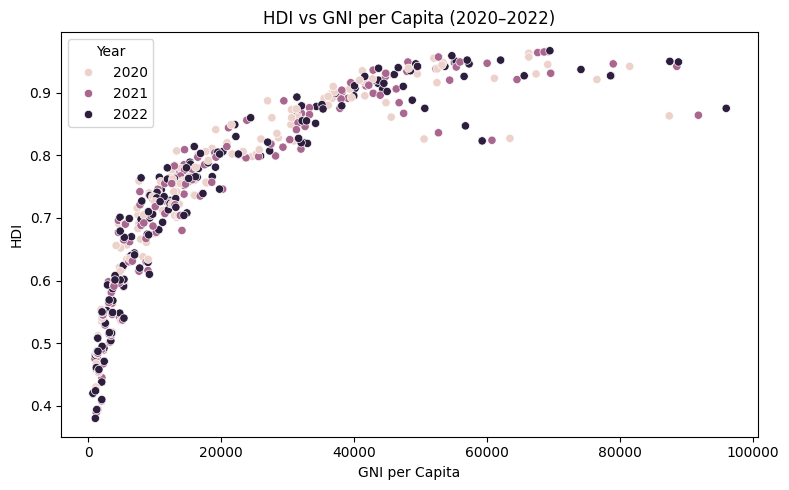

In [83]:
# Scatter plot to analyze relationship between HDI and GNI per capita
plt.figure(figsize=(8, 5))

sns.scatterplot(
    data=hdi_2020_2022_df,
    x='gross_inc_percap',
    y='hdi',
    hue='year'
)

plt.title("HDI vs GNI per Capita (2020–2022)")
plt.xlabel("GNI per Capita")
plt.ylabel("HDI")
plt.legend(title="Year")
plt.tight_layout()
plt.show()


### Q1B.1: HDI Trends Over Time (2020–2022)

The line chart shows a gradual increase in HDI values for most selected countries from 2020 to 2022. This indicates steady improvement in human development following the global impact of the COVID-19 pandemic.


### Q1B.2: Regional Differences in HDI

The bar chart highlights noticeable differences in average HDI across regions. Some regions consistently show higher average HDI values compared to others, indicating regional disparities in human development.


### Q1B.3: HDI Distribution Across Years

The box plot shows a slight upward shift in median HDI values from 2020 to 2022. The spread of HDI remains relatively stable, suggesting consistent inequality levels over time.


### Q1B.4: Relationship Between HDI and Income

The scatter plot shows a strong positive relationship between HDI and gross national income per capita. Countries with higher income levels generally exhibit higher HDI values, highlighting the role of economic prosperity in human development.


# Problem 2: Advanced HDI Exploration (South Asia)

This section performs advanced analysis of HDI and related indicators
for South Asian countries, including composite scores, outlier detection,
correlation analysis, and development gap assessment.


In [84]:
# List of South Asian countries (standard grouping)
south_asia_countries = [
    'Afghanistan', 'Bangladesh', 'Bhutan', 'India',
    'Maldives', 'Nepal', 'Pakistan', 'Sri Lanka'
]

# Filter the full dataset for South Asia countries
south_asia_df = df[df['country'].isin(south_asia_countries)].copy()

# Check available years in South Asia subset
south_asia_df['year'].unique()


array([1990, 1991, 1992, 1993, 1994, 1995, 1996, 1997, 1998, 1999, 2000,
       2001, 2002, 2003, 2004, 2005, 2006, 2007, 2008, 2009, 2010, 2011,
       2012, 2013, 2014, 2015, 2016, 2017, 2018, 2019, 2020, 2021, 2022])

In [85]:
# Filter South Asia data for the year 2022 (latest year)
south_asia_2022_df = south_asia_df[south_asia_df['year'] == 2022].copy()

# Quick preview of key indicators
south_asia_2022_df[['country', 'hdi', 'life_expectancy', 'gross_inc_percap']].head()


,country,hdi,life_expectancy,gross_inc_percap
32,Afghanistan,0.462,62.879,1335.205733
461,Bangladesh,0.670,73.698,6511.122178
659,Bhutan,0.681,72.229,10624.873880
2573,India,0.644,67.744,6950.526798
3530,Maldives,0.762,80.839,18846.792190


In [86]:
# Check missing values in key columns for South Asia 2022
south_asia_2022_df[['hdi', 'life_expectancy', 'gross_inc_percap']].isnull().sum()


,0
hdi,0
life_expectancy,0
gross_inc_percap,0


In [87]:
# Composite Development Score

from sklearn.preprocessing import MinMaxScaler

# Select indicators for composite score
features = ['hdi', 'life_expectancy', 'gross_inc_percap']

# Normalize the indicators
scaler = MinMaxScaler()
scaled_values = scaler.fit_transform(south_asia_2022_df[features])

# Create composite score as mean of normalized indicators
south_asia_2022_df['Composite_Development_Score'] = scaled_values.mean(axis=1)

# Rank countries by composite score
south_asia_2022_df[['country', 'Composite_Development_Score']] \
    .sort_values(by='Composite_Development_Score', ascending=False)


,country,Composite_Development_Score
3530,Maldives,0.981132
5477,Sri Lanka,0.789269
659,Bhutan,0.579923
461,Bangladesh,0.517351
2573,India,0.387957
4091,Nepal,0.338060
4388,Pakistan,0.224569
32,Afghanistan,0.000000


## Outlier Detection using IQR Method

The Interquartile Range (IQR) method is used to identify countries
with unusually high or low HDI values within South Asia.


In [88]:
# Outlier Detection (IQR Method)
Q1 = south_asia_2022_df['hdi'].quantile(0.25)
Q3 = south_asia_2022_df['hdi'].quantile(0.75)
IQR = Q3 - Q1

lower_bound = Q1 - 1.5 * IQR
upper_bound = Q3 + 1.5 * IQR

# Identify outliers
outliers = south_asia_2022_df[
    (south_asia_2022_df['hdi'] < lower_bound) |
    (south_asia_2022_df['hdi'] > upper_bound)
]

outliers[['country', 'hdi']]


,country,hdi


## Correlation Analysis of Development Indicators (South Asia, 2022)

This section examines the relationships between HDI, life expectancy,
and gross national income per capita using a correlation matrix.


In [89]:
# Correlation Analysis
# Select indicators for correlation
corr_data = south_asia_2022_df[
    ['hdi', 'life_expectancy', 'gross_inc_percap']
]

# Compute correlation matrix
corr_matrix = corr_data.corr()

corr_matrix


,hdi,life_expectancy,gross_inc_percap
hdi,1.000000,0.928197,0.859739
life_expectancy,0.928197,1.000000,0.897773
gross_inc_percap,0.859739,0.897773,1.000000


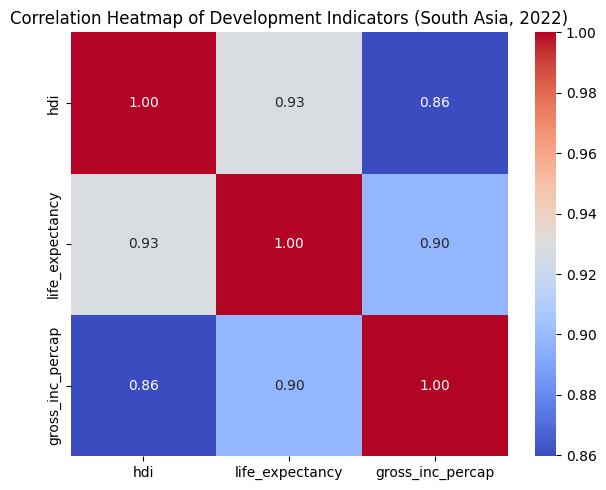

In [90]:
plt.figure(figsize=(6, 5))

sns.heatmap(
    corr_matrix,
    annot=True,
    cmap='coolwarm',
    fmt=".2f"
)

plt.title("Correlation Heatmap of Development Indicators (South Asia, 2022)")
plt.tight_layout()
plt.show()


## Development Gap Analysis (South Asia, 2022)

This analysis measures the development gap between the highest and lowest
HDI values among South Asian countries.


In [91]:
# Development Gap Analysis
# Identify highest and lowest HDI countries
highest_hdi = south_asia_2022_df.loc[
    south_asia_2022_df['hdi'].idxmax(), ['country', 'hdi']
]

lowest_hdi = south_asia_2022_df.loc[
    south_asia_2022_df['hdi'].idxmin(), ['country', 'hdi']
]

# Calculate HDI gap
hdi_gap = highest_hdi['hdi'] - lowest_hdi['hdi']

highest_hdi, lowest_hdi, hdi_gap


(country    Sri Lanka
 hdi             0.78
 Name: 5477, dtype: object,
 country    Afghanistan
 hdi              0.462
 Name: 32, dtype: object,
 np.float64(0.318))

### Q2.1: Composite Development Score Analysis

The composite development score reveals noticeable differences among South Asian countries. Countries with higher scores demonstrate better overall development outcomes, while lower-scoring countries reflect ongoing challenges in health, income, and human development.


### Q2.2: Outlier Detection Results

No significant outliers were detected using the IQR method. This indicates that HDI values among South Asian countries are relatively consistent, with no country exhibiting extreme deviation from the regional pattern.


### Q2.3: Correlation Between Development Indicators

The correlation analysis shows strong positive relationships between HDI, life expectancy, and gross national income per capita. This suggests that improvements in health and economic conditions are closely associated with higher human development in South Asia.


### Q2.4: Development Gap Analysis

The development gap analysis highlights a noticeable difference between the highest and lowest HDI values among South Asian countries. This gap reflects inequality in development levels within the region and emphasizes the need for targeted policy interventions.


# Problem 3: Comparative Regional Analysis  
(South Asia vs Middle East & North Africa)

This section compares human development indicators between
South Asia and the Middle East & North Africa regions.


In [92]:
# Problem 3: Region Comparison
# Filter data for 2022 only
df_2022 = df[df['year'] == 2022].copy()

# Add the region column to df_2022 using the existing region_mapping
df_2022['region'] = df_2022['country'].map(region_mapping)

# Use the region column you created earlier
south_asia_2022 = df_2022[df_2022['region'] == 'South Asia']
mena_2022 = df_2022[df_2022['region'] == 'Middle East & North Africa']

south_asia_2022.shape, mena_2022.shape

((8, 30), (4, 30))

In [93]:
# Select indicators for comparison
indicators = ['hdi', 'life_expectancy', 'gross_inc_percap']

# Compute mean values for each region
comparison_stats = pd.DataFrame({
    'South Asia': south_asia_2022[indicators].mean(),
    'Middle East & North Africa': mena_2022[indicators].mean()
})

comparison_stats


,South Asia,Middle East & North Africa
hdi,0.642500,0.85375
life_expectancy,71.364250,77.20475
gross_inc_percap,8195.980545,58257.33646


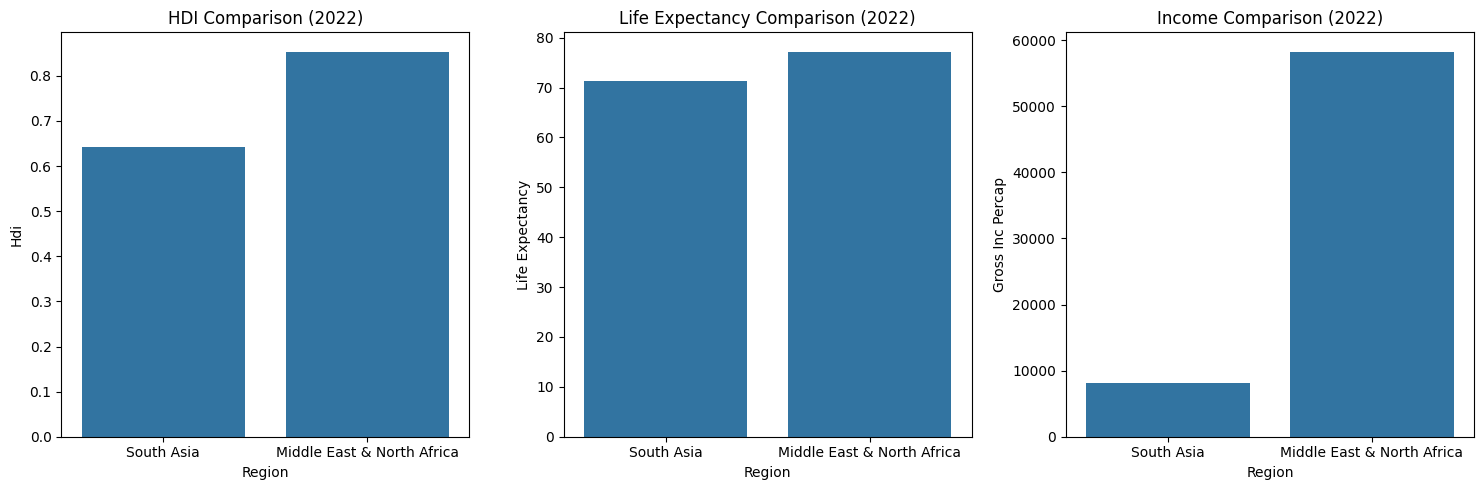

In [94]:

# Separate bar charts per indicator
fig, axes = plt.subplots(1, 3, figsize=(15, 5))

indicators = ['hdi', 'life_expectancy', 'gross_inc_percap']
titles = ['HDI Comparison (2022)', 'Life Expectancy Comparison (2022)', 'Income Comparison (2022)']

for i, indicator in enumerate(indicators):
    sns.barplot(
        x=['South Asia', 'Middle East & North Africa'],
        y=[
            south_asia_2022[indicator].mean(),
            mena_2022[indicator].mean()
        ],
        ax=axes[i]
    )
    axes[i].set_title(titles[i])
    axes[i].set_ylabel(indicator.replace('_', ' ').title())
    axes[i].set_xlabel("Region")

plt.tight_layout()
plt.show()


 INTERPREATION:

IN 2022, the Middle East & North Africa region shows higher average values for HDI, life expectancy, and gross national income per capita compared to South Asia. This indicates that countries in the MENA region generally experience better human development outcomes. South Asia, while showing progress, continues to lag behind in income and overall human development, highlighting persistent regional development gaps.

Why different plots?


HDI, life expectancy, and gross national income per capita are measured on very different numerical scales. Gross national income values are significantly larger than HDI and life expectancy values, which makes combined visualization difficult to interpret. Therefore, separate bar charts were used for each indicator to ensure clarity, accurate comparison, and better visual interpretation without distorting the underlying data.

### Q3.1: Regional Comparison of Development Indicators

The comparison shows that the Middle East & North Africa region has higher average HDI, life expectancy, and gross national income per capita than South Asia in 2022. This indicates stronger overall development outcomes in the MENA region.


### Q3.2: Overall Regional Performance

The Middle East & North Africa region performs better overall due to higher income levels, improved health outcomes, and higher HDI values. South Asia continues to face development challenges despite gradual progress.


### Q3.3: Reason for Using Separate Graphs

HDI, life expectancy, and gross national income per capita are measured on different numerical scales. Plotting them in separate graphs ensures clear visualization and prevents larger-scale variables from overshadowing smaller-scale indicators.
